# 새해 첫날의 기온 그래프 그리기

In [ ]:
# 데이터 읽어오기

import csv
f = open('./excel/seoul.csv')
data = csv.reader(f)                
next(data) # 헤더 부분을 next() 함수를 사용해 제외

result = []

for row in data:
    if row[-1] != '': #최고 기온의 값이 존대한다면
        result.append(float(row[-1])) # result 리스트에 최고 기온의 값 추가
print(len(result))

In [43]:
import pandas as pd
data =pd.read_csv('./excel/seoul.csv',encoding='cp949')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40221 entries, 0 to 40220
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40221 non-null  object 
 1   지점       40221 non-null  int64  
 2   평균기온(℃)  39465 non-null  float64
 3   최저기온(℃)  39464 non-null  float64
 4   최고기온(℃)  39463 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB
None


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 결측치 처리 
---

In [44]:
data = data.dropna(axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39463 entries, 0 to 40220
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       39463 non-null  object 
 1   지점       39463 non-null  int64  
 2   평균기온(℃)  39463 non-null  float64
 3   최저기온(℃)  39463 non-null  float64
 4   최고기온(℃)  39463 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.8+ MB
None


## 평균 온도 시각화 하기
---

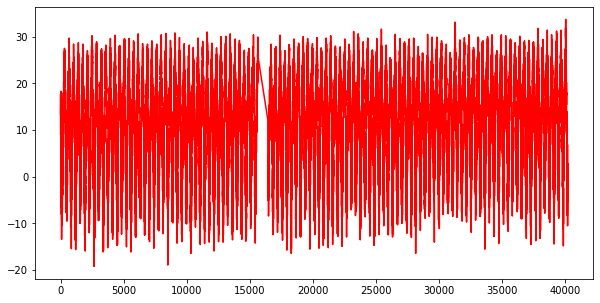

In [45]:
import matplotlib.pyplot as plt
result = data['평균기온(℃)']
plt.figure(figsize=(10,5))
plt.plot(result,'r')
plt.show()

# 1년 중 8월의 최고 기온 데이터만 추출해서 그래프로 그리기
---

In [48]:
# 날짜 데이터에서 월, 일 데이터 추출해서 새로운 컬럼 생성
month = []
day = []
for d in data['날짜']:
    month.append(d.split('-')[1])
    day.append(d.split('-')[2])
data['달'] = month
data['일'] = day
data.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),달,일
0,1907-10-01,108,13.5,7.9,20.7,10,01
1,1907-10-02,108,16.2,7.9,22.0,10,02
2,1907-10-03,108,16.2,13.1,21.3,10,03
3,1907-10-04,108,16.5,11.2,22.0,10,04
4,1907-10-05,108,17.6,10.9,25.4,10,05


3348


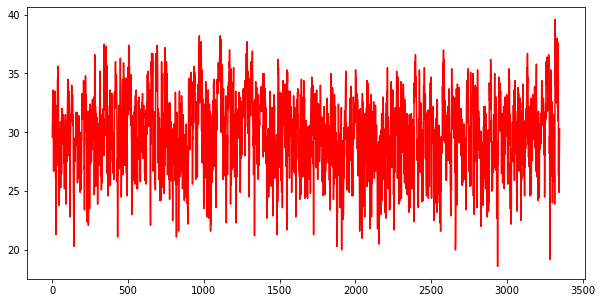

In [56]:
# 8월 최고 기온 데이터 추출
data_Aug = data[data['달'] == '08']
#data_Aug= data_Aug.reset_index()
result = data_Aug['최고기온(℃)']

# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(result, 'r')
plt.show()

# 매년 새해 첫날의 평균기온 그래프
---

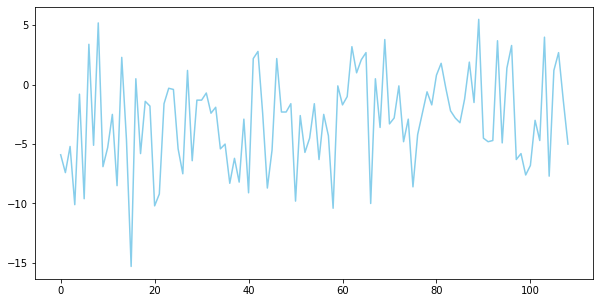

In [60]:
data_new = data[data['달'] == '01']
data_new = data_new[data_new['일']=='01']

data_new = data_new.reset_index() #인덱스 초기화
result = data_new['평균기온(℃)']

# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(result, 'skyblue')
plt.show()